In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


Head берет первые n строк из датафрейма, по дефолту - 5

In [127]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Теперь обработаем данные и подумаем о том, все ли данные нам нужны для решения задачи

In [128]:
data = data.drop(["PassengerId", "Name", "Ticket"], axis=1)

Разделим датасет на тренировочный и тестовый, а также отделим целевую переменную от всего остального датасета

In [129]:
y = data["Survived"]
data = data.drop(["Survived"], axis=1)

In [130]:
data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [131]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Проверим, где есть пустые ячейки

In [132]:
data.columns[data.isna().any()].to_list

<bound method IndexOpsMixin.tolist of Index(['Age', 'Cabin', 'Embarked'], dtype='object')>

Посмотрим на распределение данных

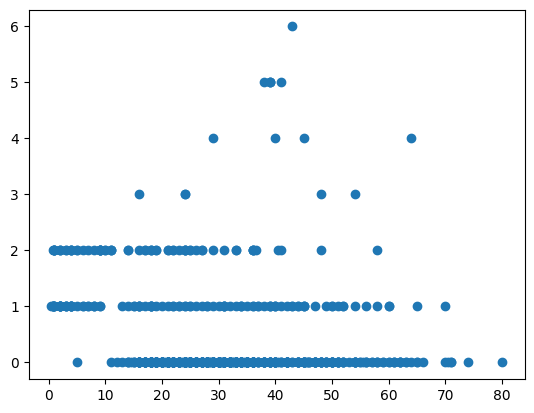

In [133]:
plt.scatter(data["Age"], data["Parch"])

In [134]:
data["Age"].mean(), data["Age"].median()

(29.69911764705882, 28.0)

Обычно удобно заполнить пропуски каким-то средним значением

In [135]:
data["Age"] = data["Age"].fillna(28)

In [136]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,28.0,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [137]:
data["Embarked"] = data["Embarked"].fillna('S')  # заполнили самым частым значением

Далее посмотрим на cabin, там много пропусков, поэтому есть смысл удалить колонку из рассмотрения

In [138]:
data["Cabin"].isna().sum(), len(data)

(687, 891)

Убедимся что в данных нет пропусков

In [139]:
data = data.drop(["Cabin"], axis=1)

In [140]:
assert not data.isnull().values.any()

In [141]:
data


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


Модели мл зачастую работают только с числами, поэтому надо разобраться с категориальными признаками

In [142]:
data["Sex"] = data["Sex"].astype('category')
data["Sex"] = data["Sex"].cat.codes

In [143]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


В колонке Embarked 3 значения и если мы введем 0,1,2, то создадим ненужное отношение больше - меньше

Поэтому создадим 3 столбца, каждый с названием одного из значений Embarked

In [144]:
data = pd.get_dummies(data, columns=["Embarked"])

In [145]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,False,True
1,1,0,38.0,1,0,71.2833,True,False,False
2,3,0,26.0,0,0,7.9250,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,True
4,3,1,35.0,0,0,8.0500,False,False,True


Мы обработали данные, теперь разделим датасет на тестовый и тренировочный и начнем обучать модель

In [146]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_y, val_y = train_test_split(data, y, test_size=0.3)  # 0.3 - 30% идет на тест

In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ищем 3 ближайших соседа

In [148]:
knn = KNeighborsClassifier(n_neighbors=3)

In [149]:
knn.fit(train_data, train_y)

KNeighborsClassifier(n_neighbors=3)

Мы обучили модель, теперь посмотрим на ее предсказания

In [150]:
predicted = knn.predict(val_data)
predicted

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [151]:
np.array(val_y)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [152]:
accuracy_score(predicted, val_y)

0.7350746268656716

Теперь подберем этот параметр k от 1 до 20, обучим для каждого k модель и посчитаем точность

In [173]:
val_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_y)
    predicted = knn.predict(val_data)
    val_scores.append(accuracy_score(predicted, val_y))

Text(0, 0.5, 'accuracy')

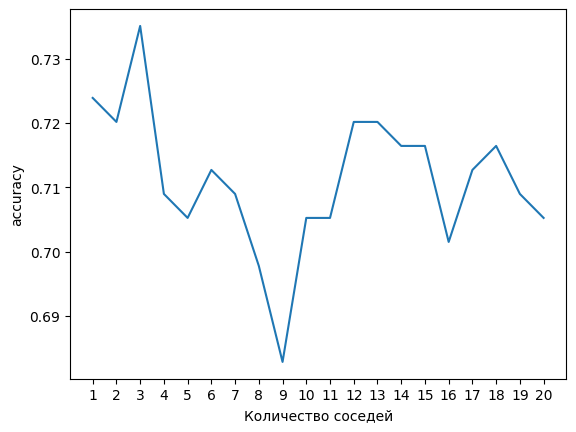

In [154]:
plt.plot(list(range(1, 21)), val_scores)
plt.xticks(list(range(1, 21)))
plt.xlabel("Количество соседей")
plt.ylabel("accuracy")

Получим ответ для тестового датасета

In [182]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Аналогично обработаем данные

In [183]:
test_data = test_data.drop(["PassengerId", "Name", "Ticket"], axis=1)
test_data["Age"] = test_data["Age"].fillna(28)
test_data["Embarked"] = test_data["Embarked"].fillna('S')
test_data = test_data.drop(["Cabin"], axis=1)
test_data["Sex"] = test_data["Sex"].astype('category')
test_data["Sex"] = test_data["Sex"].cat.codes
test_data = pd.get_dummies(test_data, columns=["Embarked"])
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,1,62.0,0,0,9.6875,False,True,False
3,3,1,27.0,0,0,8.6625,False,False,True
4,3,0,22.0,1,1,12.2875,False,False,True


Проверим этот датасет на пропуски

In [184]:
test_data.isna().any()

Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare           True
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [185]:
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].median())

Теперь обучим алгоритм на всей тренировочной выборке с учетом оптимального k

In [186]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, y)

KNeighborsClassifier(n_neighbors=3)

In [187]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,1,62.0,0,0,9.6875,False,True,False
3,3,1,27.0,0,0,8.6625,False,False,True
4,3,0,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500,False,False,True
414,1,0,39.0,0,0,108.9000,True,False,False
415,3,1,38.5,0,0,7.2500,False,False,True
416,3,1,28.0,0,0,8.0500,False,False,True


In [188]:
test_predicted = knn.predict(test_data)
test_predicted

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

Сохраним полученные ответы

In [189]:
test_predicted=pd.DataFrame({"Survived:" : test_predicted})
test_predicted["PassengerId"] = list(range(892,892+len(test_data)))
test_predicted.to_csv("output/test_predicted.csv")